In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , stratify=y)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((4363, 50), (1091, 50), (4363,), (1091,))

## Training the machine learning model

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC(C=1.0 , kernel='rbf' , gamma=0.01 , probability=True)

In [8]:
model.fit(x_train , y_train)
print("Model trained successfully")

Model trained successfully


In [9]:
model.score(x_train , y_train)

0.862250744900298

In [10]:
model.score(x_test , y_test)

0.8010999083409716

## Model Evaluation
1. Confusion Matrix
2. Classification Report
3. Kappa Score
4. ROC and AUC

In [11]:
from sklearn import metrics

In [12]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

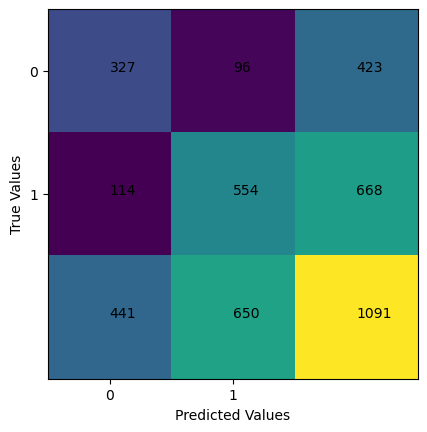

In [39]:
cm = metrics.confusion_matrix(y_test , y_pred)
cm = np.concatenate((cm , cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm , cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i , j , '%d'%cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [14]:
## Classification Report
cr = metrics.classification_report(y_test , y_pred , target_names=['male' , 'female'] , output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.765403,0.732426,0.748552,441.0000
female,0.823617,0.847692,0.835481,650.0000
accuracy,0.801100,0.801100,0.801100,0.8011
macro avg,0.794510,0.790059,0.792016,1091.0000
weighted avg,0.800086,0.801100,0.800343,1091.0000


In [15]:
## Kappa Score

metrics.cohen_kappa_score(y_test , y_pred)

0.584164867765387

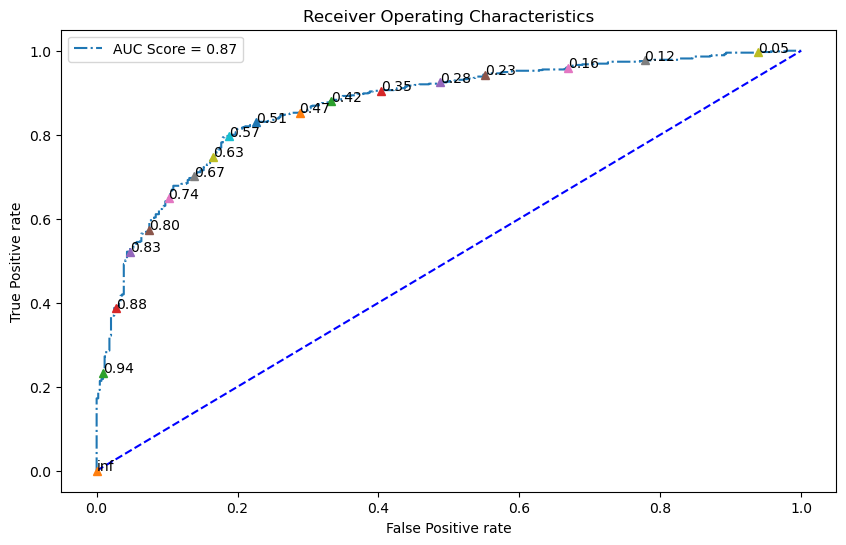

In [16]:
## ROC for female

fpr , tpr , thresh = metrics.roc_curve(y_test , y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0 , len(thresh) , 20):
    plt.plot(fpr[i],tpr[i] , '^')
    plt.text(fpr[i],tpr[i] , '%0.2f'%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])
    
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.show()

## Hyper Parameter tuning

In [17]:
model_tune = SVC()

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'C' : [1,10,20,30,50,100] ,
    'kernel' : ['rbf' , 'poly'] , 
    'gamma' : [0.1 , 0.05 , 0.01 , 0.001 , 0.002 , 0.005] , 
    'coef0' : [0,1]
}

In [20]:
model_grid = GridSearchCV(model_tune , param_grid=param_grid , scoring='accuracy' , cv=5 , verbose=1)

In [21]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [22]:
model_grid.best_index_

69

In [23]:
model_grid.best_params_

{'C': 20, 'coef0': 1, 'gamma': 0.002, 'kernel': 'poly'}

In [24]:
model_grid.best_score_

0.7880461490594438

In [32]:
## Build best ML model with best parameter
model_best = SVC(C=20 , kernel='poly' , gamma=0.002 , coef0=1 , probability=True)

In [33]:
model_best.fit(x_train , y_train)
model_best.score(x_test , y_test)

0.8075160403299725

In [34]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test)

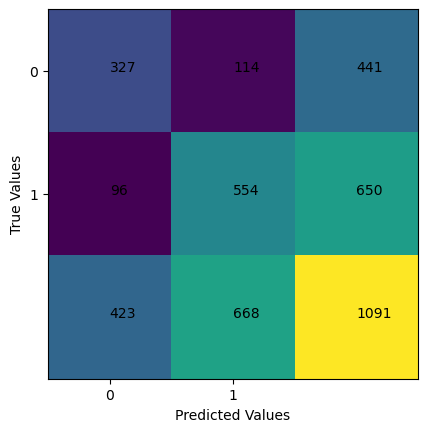

In [40]:
cm = metrics.confusion_matrix(y_test , y_pred)
cm = np.concatenate((cm , cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm , cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j , i , '%d'%cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [41]:
cr = metrics.classification_report(y_test , y_pred , target_names=['male' , 'female'] , output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.773050,0.741497,0.756944,441.000000
female,0.829341,0.852308,0.840668,650.000000
accuracy,0.807516,0.807516,0.807516,0.807516
macro avg,0.801195,0.796902,0.798806,1091.000000
weighted avg,0.806587,0.807516,0.806825,1091.000000


In [42]:
metrics.cohen_kappa_score(y_test , y_pred)

0.5977265783845854

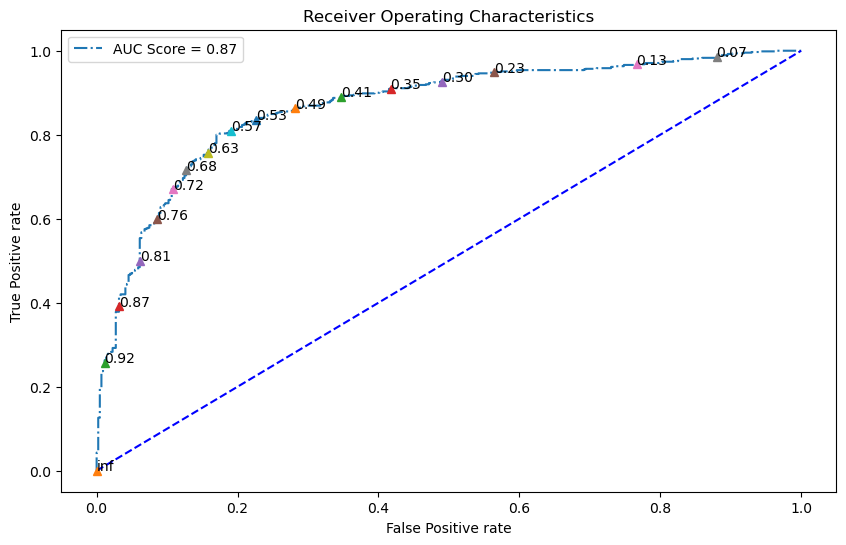

In [43]:
fpr , tpr , thresh = metrics.roc_curve(y_test , y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0 , len(thresh) , 20):
    plt.plot(fpr[i],tpr[i] , '^')
    plt.text(fpr[i],tpr[i] , '%0.2f'%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])
    
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [44]:
import pickle

In [45]:
pickle.dump(model_best , open('model_svm.pickle','wb'))

In [46]:
pickle.dump(mean , open('./model/mean_preprocess.pickle' , 'wb'))